# 1. First Approach to the Dataset

## 1.1. Environment Setup and Python Libraries Installation

- **Nibabel:** to load and manipulate NIfTI files.
- **Nilearn:** to facilitate the processing and visualization of neuroimaging data.
- **Matplotlib and Seaborn:** for data visualization.
- **Numpy and Pandas:** for data manipulation and analysis.

In [7]:
!pip install nibabel nilearn numpy pandas matplotlib seaborn

## 1.2. Data Loading

We load the downloaded ".nii.gz" files using nibabel, a library specialized for handling neuroimaging data.

In [27]:
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

"""
Las siguientes líneas de código deben modificarse para correr desde un contenedor Docker
"""

# Ruta de la carpeta actual (donde está el notebook)
current_folder = os.getcwd()

parent_folder = os.path.dirname(current_folder)

# Ruta relativa al archivo .nii.gz
relative_path = r'abide/Outputs/cpac/filt_noglobal/reho/Caltech_0051456_reho.nii.gz'

# Construir la ruta completa usando os.path.join
file_path = os.path.join(parent_folder, relative_path)

# Verificar la ruta
print(file_path)

# Load the NIfTI file
img = nib.load(file_path)
data = img.get_fdata()

print(f"Data shape: {data.shape}")


/home/agustinnr/data/abide/Outputs/cpac/filt_noglobal/reho/Caltech_0051456_reho.nii.gz
Data shape: (61, 73, 61)


## 1.3. Visualize the DataWe  can visualize slices of the brain to get an initial understanding of the data.

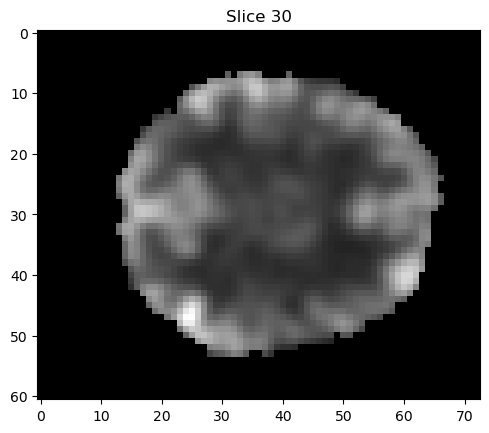

In [21]:
# Visualize a middle slice of the data
slice_index = data.shape[2] // 2
plt.imshow(data[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.show()

## 1.4. Check Data Quality
Examine basic statistics and check for any obvious issues such as NaNs or extreme values.

In [22]:
print(f"Data type: {data.dtype}")
print(f"Min value: {np.min(data)}")
print(f"Max value: {np.max(data)}")
print(f"Mean value: {np.mean(data)}")
print(f"Standard deviation: {np.std(data)}")

# Check for NaNs
print(f"Any NaNs in data: {np.isnan(data).any()}")


Data type: float64
Min value: 0.0
Max value: 0.3129104673862457
Mean value: 0.018954227073232778
Standard deviation: 0.04369735477720224
Any NaNs in data: False


## 1.5. Prepare Data for Machine Learning

In this step we extract features from the brain imaging data. Given that we used ReHo (Regional Homogeneity), we could summarize this measure across different brain regions. We use nilearn to extract region-specific features.

In [29]:
from nilearn import input_data
from nilearn import datasets

# Load the atlas
atlas = datasets.fetch_atlas_aal()
atlas_filename = atlas.maps

# Create a masker object
masker = input_data.NiftiLabelsMasker(labels_img=atlas_filename, normalization=True)

# Extract the regional homogeneity signals
time_series = masker.fit_transform(file_path)

print(f"Extracted time series shape: {time_series.shape}")

Extracted time series shape: (1, 116)


## 1.6. Data Visualization and Statistics


Once you have the time series data, you can perform further statistical analysis and visualize the extracted features.

       Region_0  Region_1  Region_2  Region_3  Region_4  Region_5  Region_6  \
count  1.000000  1.000000  1.000000  1.000000  1.000000   1.00000  1.000000   
mean   0.078748  0.082554  0.091318  0.098637  0.017474   0.04287  0.111249   
std         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
min    0.078748  0.082554  0.091318  0.098637  0.017474   0.04287  0.111249   
25%    0.078748  0.082554  0.091318  0.098637  0.017474   0.04287  0.111249   
50%    0.078748  0.082554  0.091318  0.098637  0.017474   0.04287  0.111249   
75%    0.078748  0.082554  0.091318  0.098637  0.017474   0.04287  0.111249   
max    0.078748  0.082554  0.091318  0.098637  0.017474   0.04287  0.111249   

       Region_7  Region_8  Region_9  ...  Region_106  Region_107  Region_108  \
count  1.000000   1.00000  1.000000  ...     1.00000    1.000000    1.000000   
mean   0.122571   0.05098  0.051863  ...     0.06155    0.002493    0.090025   
std         NaN       NaN       NaN  ...        

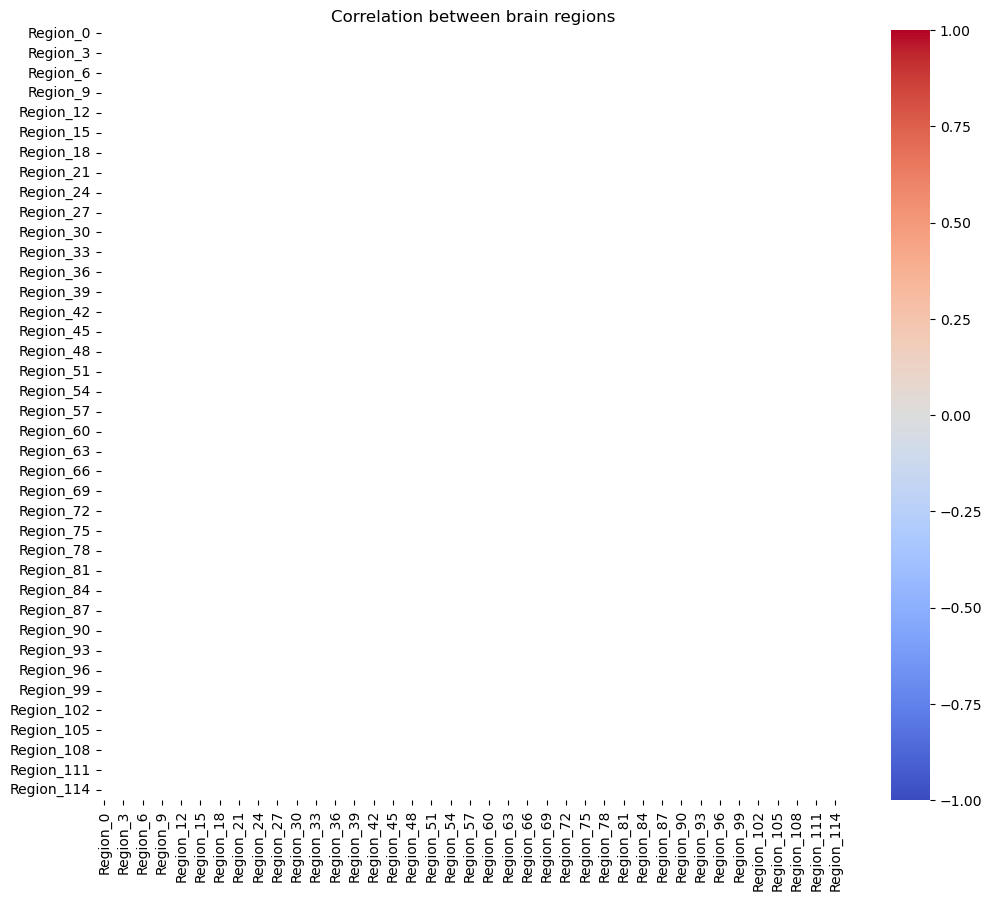

In [36]:
df = pd.DataFrame(time_series, columns=[f"Region_{i}" for i in range(time_series.shape[1])])

df_clean = df

# Summary statistics
print(df_clean.describe())

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean.corr(), annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation between brain regions")
plt.show()